<a href="https://colab.research.google.com/github/MargaritaShcherbak/Administration-of-network-subsystems/blob/main/Lab1_%D0%A9%D0%B5%D1%80%D0%B1%D0%B0%D0%BA_%D0%9C%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения


##### Студент:  Щербак Маргарита Романовна
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант №18

1. Набор данных: cherry_blossoms

2. Независимая переменная: temp_lower

3. Зависимая переменная: year

4. Визуализация для независимой переменной – столбчатая диаграмма

5. Визуализация для зависимой переменной – эмпирическая плотность распределения

6. Показатель качества регрессии – MAE (mean absolute error)

**Задание 1**

Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и выведите названия пар признаков с наиболее низкой и наиболее высокой корреляцией.  
Набор данных cherry_blossoms содержит информацию, связанную с цветением вишни, включая некоторые признаки.


In [ ]:
import tensorflow_datasets as tfds
import pandas as pd

# Загрузка датасета
ds = tfds.load("cherry_blossoms", split='train')
ds

<_PrefetchDataset element_spec={'doy': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp_lower': TensorSpec(shape=(), dtype=tf.float32, name=None), 'temp_upper': TensorSpec(shape=(), dtype=tf.float32, name=None), 'year': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

In [ ]:
# Преобразование датасета в pandas DataFrame
df = tfds.as_dataframe(ds)
#df
print(df)

        doy  temp  temp_lower  temp_upper  year
0       NaN  6.46        4.76        8.16  1300
1     105.0  5.63        4.90        6.37  1638
2     109.0  5.81        4.68        6.95  1347
3     104.0  5.70        4.87        6.53  1187
4     107.0  6.20        5.31        7.09  1617
...     ...   ...         ...         ...   ...
1210  100.0  6.45        5.81        7.10  1577
1211  103.0  5.71        4.97        6.44  1640
1212  108.0  6.68        6.08        7.27  1925
1213  112.0  6.15        5.29        7.01  1624
1214    NaN  7.07        6.00        8.14  1393

[1215 rows x 5 columns]



Оставим в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую (temp_lower) и зависимую (year) переменные.   
 Удалим строки, в которых содержится NaN

In [ ]:
# Удаление строк с NaN значениями
df = df.dropna()
print(df)

        doy  temp  temp_lower  temp_upper  year
1     105.0  5.63        4.90        6.37  1638
2     109.0  5.81        4.68        6.95  1347
3     104.0  5.70        4.87        6.53  1187
4     107.0  6.20        5.31        7.09  1617
7     107.0  5.38        4.78        5.98  1652
...     ...   ...         ...         ...   ...
1209  116.0  4.85        3.82        5.88  1319
1210  100.0  6.45        5.81        7.10  1577
1211  103.0  5.71        4.97        6.44  1640
1212  108.0  6.68        6.08        7.27  1925
1213  112.0  6.15        5.29        7.01  1624

[787 rows x 5 columns]


In [ ]:
df.head()

,doy,temp,temp_lower,temp_upper,year
1,105.0,5.63,4.90,6.37,1638
2,109.0,5.81,4.68,6.95,1347
3,104.0,5.70,4.87,6.53,1187
4,107.0,6.20,5.31,7.09,1617
7,107.0,5.38,4.78,5.98,1652


Вычислим матрицу корреляции между выбранными признаками


In [ ]:
df.corr()

,doy,temp,temp_lower,temp_upper,year
doy,1.000000,-0.326976,-0.271967,-0.294773,0.013970
temp,-0.326976,1.000000,0.858841,0.876747,0.028033
temp_lower,-0.271967,0.858841,1.000000,0.506662,0.386703
temp_upper,-0.294773,0.876747,0.506662,1.000000,-0.315807
year,0.013970,0.028033,0.386703,-0.315807,1.000000


Найдём пары признаков с наиболее высокой и наиболее низкой корреляцией.

В варианте ниже идет поиск макс. и мин. значений не между всеми парами, а между каждой.

Не учитываем пары самих себя (year - year).

In [ ]:
import numpy as np
correlation_matrix=df.corr()
np.fill_diagonal(correlation_matrix.values, np.nan)
print('Высокая корреляция между парами:', '\n',correlation_matrix.idxmax())
print( '\n')
print('Низкая корреляция между парами:', '\n',correlation_matrix.idxmin())


Высокая корреляция между парами: 
 doy                 year
temp          temp_upper
temp_lower          temp
temp_upper          temp
year          temp_lower
dtype: object


Низкая корреляция между парами: 
 doy                 temp
temp                 doy
temp_lower           doy
temp_upper          year
year          temp_upper
dtype: object


Во втором варианте ниже показан вывод макс. и мин. корреляцией из числа всех пар между признаками.

In [ ]:
import numpy as np

np.fill_diagonal(correlation_matrix.values, np.nan) # диагональные элементы не учитываем

print("Пары признаков с наиболее высокой корреляцией:")
max_corr = correlation_matrix.stack().max()
max_corr_pairs = correlation_matrix.unstack()[(correlation_matrix.unstack() == max_corr)].head(1)
print(max_corr_pairs)

print("\nПары признаков с наименьшей корреляцией:")
min_corr = correlation_matrix.stack().min()
min_corr_pairs = correlation_matrix.unstack()[(correlation_matrix.unstack() == min_corr)].head(1)
print(min_corr_pairs)


Пары признаков с наиболее высокой корреляцией:
temp  temp_upper    0.876747
dtype: float64

Пары признаков с наименьшей корреляцией:
doy  temp   -0.326976
dtype: float64


**Задание 2**  
Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием.

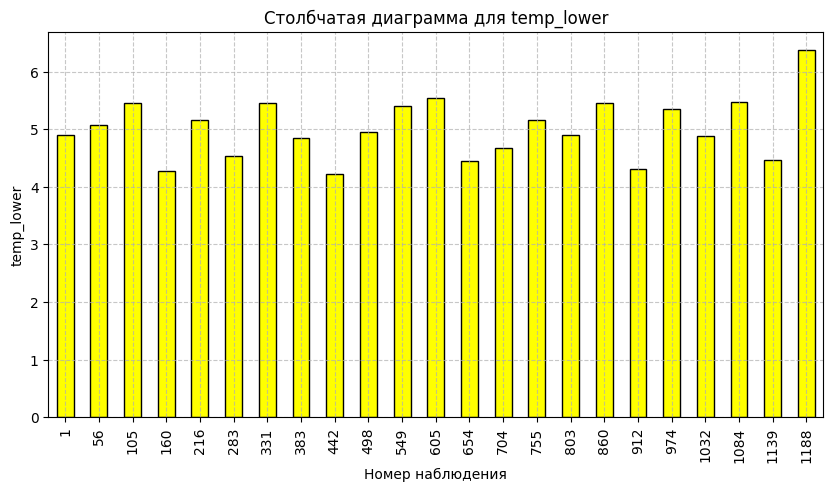

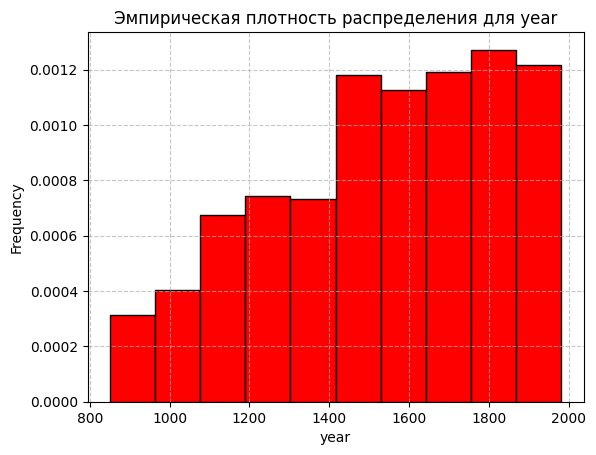

In [ ]:
import matplotlib.pyplot as plt
# Столбчатая диаграмма для temp_lower
df[::35]['temp_lower'].plot.bar(title='Столбчатая диаграмма для temp_lower',color='yellow',edgecolor='black', figsize=(10,5)); # с шагом 35
plt.xlabel('Номер наблюдения', fontsize=10)  # Подпись для оси X
plt.ylabel('temp_lower', fontsize=10)  # Подпись для оси Y
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Эмпирическая плотность распределения для year
df['year'].plot.hist(title='Эмпирическая плотность распределения для year', color='red', edgecolor='black', density=True);
plt.xlabel('year', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Задание 3**  
Постройте диаграмму рассеяния для независимого и зависимого признаков, подписывая оси и рисунок, определите наличие одиноко расположенные точек и, при наличии, удалите их.    
На графике в левом нижнем углу мы видим одинокие точки. 4 штуки, которые отдалены. Уберем их

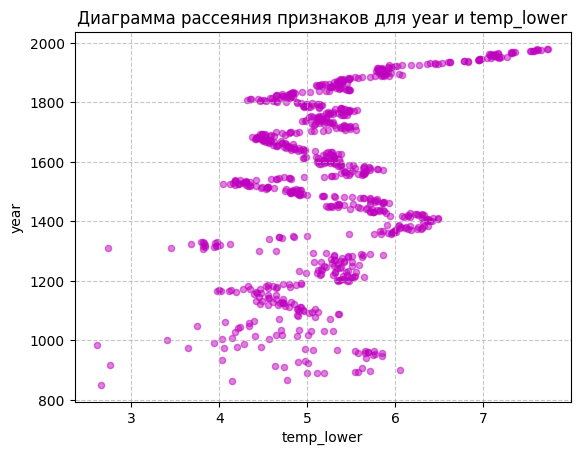

In [ ]:
df.plot.scatter('temp_lower','year',title='Диаграмма рассеяния признаков для year и temp_lower', color='m', alpha=0.5);
plt.grid(True, linestyle='--', alpha=0.7)

Удалим одинокие точки. Масштаб графика другой.

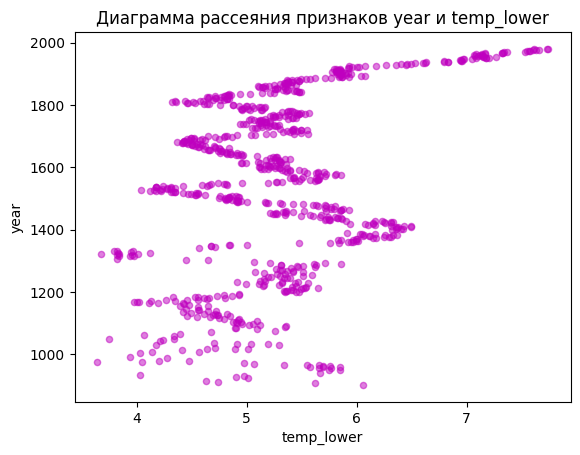

In [ ]:
# Построение диаграммы рассеяния с фильтрацией данных
df[(df['year'] > 900) & (df['temp_lower'] >= 3.5)].plot.scatter('temp_lower', 'year', title='Диаграмма рассеяния признаков year и temp_lower', color='m', alpha=0.5)

# Подписываем оси
plt.xlabel('temp_lower')
plt.ylabel('year')
plt.show()


**Задание 4**      
Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Определите лучший из двух подходов по показателю качества R^2 (коэффициенту детерминации).   
Показатель качества регрессии – MAE (mean absolute error)



Разделим данные на обучающую и тестовую выборки с использованием функции train_test_split.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Разбиение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(np.array(df['temp_lower']), np.array(df['year']), test_size=0.02345)

Определим класс SimpleLinReg для парной линейной регрессии, который реализует методы fit для обучения модели и predict для прогнозирования.

In [ ]:
# Определение класса для парной линейной регрессии
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, "В данных должен быть один признак"
        assert len(x_train) == len(y_train), "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

Создадим экземпляр SimpleLinReg, обучим его на обучающих данных и спрогнозируем значения для тестовых данных. Вычислим среднюю абсолютную ошибку (MAE) и коэффициент детерминации (R^2) для парной линейной регрессии.  
$MAE=\frac{1}{n}\sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|$  


In [ ]:
# Создание и обучение модели парной линейной регрессии
reg = SimpleLinReg()
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)

# Вычисление MAE и R^2 для парной линейной регрессии
mae_test_linreg = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
r2_linreg = 1 - mae_test_linreg / np.var(y_test)


Создадим и скомпилируем модель нейронной сети с помощью библиотеки TensorFlow, обучим ее на обучающих данных и спрогнозируем значения для тестовых данных. Вычислим MAE и R^2 для нейронной сети.

In [ ]:
# Создание и обучение модели нейронной сети
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])
model.compile(loss=tf.keras.losses.mean_absolute_error, optimizer=tf.keras.optimizers.Adam(learning_rate=0.25), metrics=['mean_absolute_error'])
model.fit(x_train, y_train, epochs=250, verbose=0)

# Прогнозирование с использованием нейронной сети и вычисление MAE
y_predict2 = model.predict(x_test)
mae_test_nn = np.sum(np.absolute(y_predict2 - y_test)) / len(y_test)

# Вычисление R^2 для нейронной сети
r2_nn = 1 - mae_test_nn / np.var(y_test)

1/1 [==============================] - 0s 46ms/step


Коэффициент детерминации для парной линейной регрессии: 0.9965928790860905
Коэффициент детерминации для модели нейронной сети: 0.9389850949985526


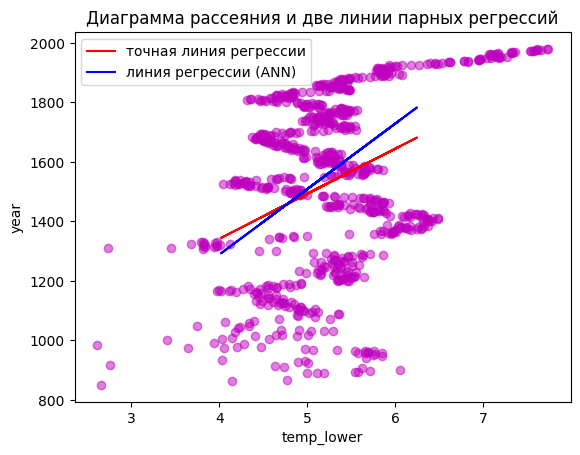

In [ ]:
# Вывод результатов
print("Коэффициент детерминации для парной линейной регрессии:", r2_linreg)
print("Коэффициент детерминации для модели нейронной сети:", r2_nn)

# Визуализация
plt.scatter(df["temp_lower"], df["year"], color='m', alpha=0.5)
plt.plot(x_test, y_predict, c='r', label='точная линия регрессии')
plt.plot(x_test, y_predict2, c='b', label='линия регрессии (ANN)')
plt.title('Диаграмма рассеяния и две линии парных регрессий')
plt.xlabel("temp_lower")
plt.ylabel("year")
plt.legend()
plt.show()

Коэффициент детерминации для парной линейной регрессии составляет 0.9968. Это очень высокое значение, близкое к 1, что указывает на то, что парная линейная регрессия хорошо объясняет вариацию целевой переменной (в данном случае "year") с помощью одного предиктора (в данном случае "temp_lower").   
Коэффициент детерминации для модели нейронной сети равен 0.9299. Это также высокое значение, но немного ниже, чем у парной линейной регрессии. Это может означать, что нейронная сеть объясняет некоторую долю вариации в данных, но не настолько хорошо, как парная линейная регрессия.   
Таким образом, выводы показывают, что на этих конкретных данных парная линейная регрессия имеет более высокую предсказательную силу по сравнению с нейронной сетью.

**Задание 5**    
Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду для линий регрессии.  

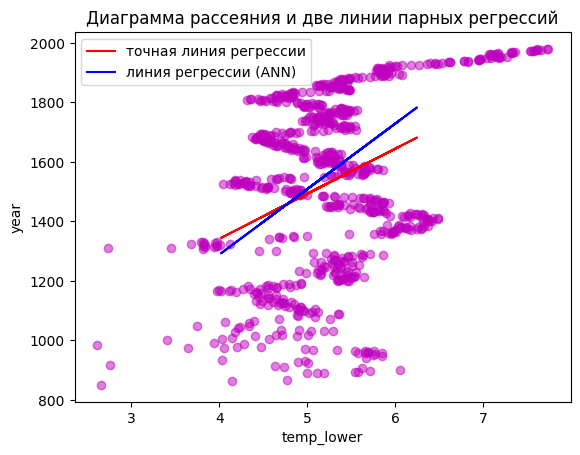

In [ ]:
plt.scatter(df["temp_lower"], df["year"], color='m', alpha=0.5)
plt.plot(x_test, y_predict, c='r', label='точная линия регрессии')
plt.plot(x_test, y_predict2, c='b', label='линия регрессии (ANN)')
plt.title('Диаграмма рассеяния и две линии парных регрессий')
plt.xlabel("temp_lower")
plt.ylabel("year")
plt.legend()
plt.show()

**Задание 6**   
Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака). Нормализуйте зависимый признак.

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

x_train = train_data.drop(columns=['year']).values
y_train = train_data['year'].values
x_test = test_data.drop(columns=['year']).values
y_test = test_data['year'].values

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_train)

y_train_s = (y_train - y_train.mean()) / y_train.std()

**Задание 7**  
Используя созданный нормализующий слой и нормализованный зависимый признак, постройте регресоры на базе следующих моделей множественной регрессии:    
 - линейной регрессии    
 - гребневой регрессии (L2)    
 - лассо регрессии (L1)   



*Линейная регрессия*

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

linear_model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.optimizers.Adam(learning_rate=0.0725),
)

history = linear_model.fit(
    x_train, y_train_s,
    epochs=200,
    verbose=0,
    validation_split = 0.2)


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,0.577522,0.536098,195
196,0.557777,0.505070,196
197,0.547097,0.512168,197
198,0.556518,0.514234,198
199,0.560924,0.512362,199


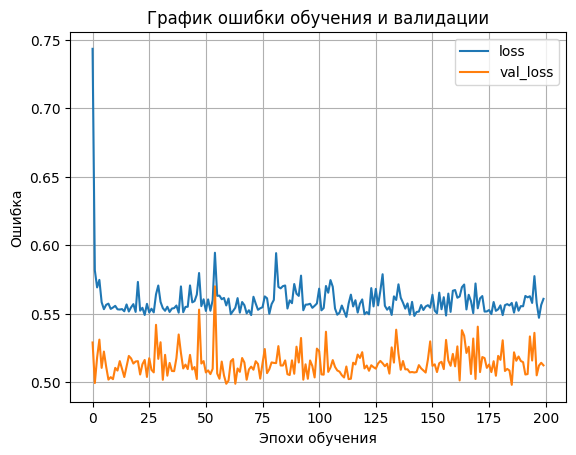

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.title("График ошибки обучения и валидации")
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(True)

plot_loss(history)

*Лассо регрессия*

In [ ]:
l1_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))
])

l1_model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.optimizers.Adam(learning_rate=0.0725),
)

history = l1_model.fit(
    x_train, y_train_s,
    epochs=200,
    verbose=0,
    validation_split = 0.2)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,0.573143,0.534769,195
196,0.576522,0.531993,196
197,0.572644,0.535037,197
198,0.589196,0.528780,198
199,0.574992,0.547352,199


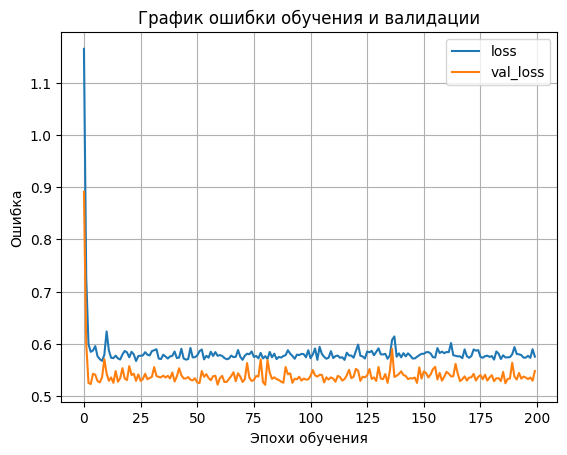

In [ ]:
plot_loss(history)

*Гребневая регрессия*

In [ ]:
l2_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))
])

l2_model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.optimizers.Adam(learning_rate=0.0125),
)

history = l2_model.fit(
    x_train, y_train_s,
    epochs=200,
    verbose=0,
    validation_split = 0.2)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,0.565145,0.534093,195
196,0.565469,0.533138,196
197,0.564088,0.533892,197
198,0.564416,0.529895,198
199,0.563837,0.532696,199


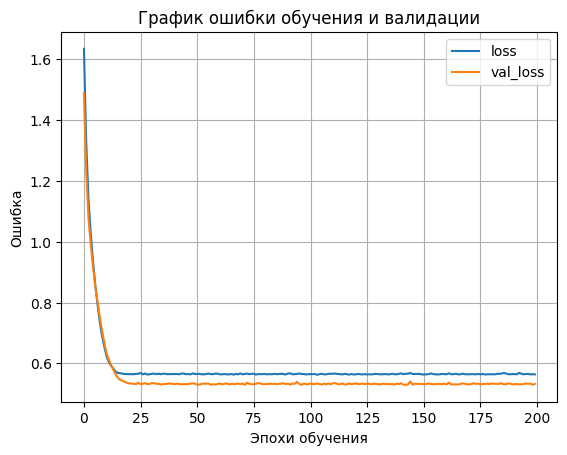

In [ ]:
plot_loss(history)

**Задание 8**   
Определите на контрольной выборке (с нормализованным зависимым признаком) модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

Определим на контрольной выборке модель множественной регрессии с наиболее высоким качеством по показателю MAE

In [ ]:
linear_model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 1533.3217


1533.3216552734375

In [ ]:
l1_model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 1533.2532


1533.253173828125

In [ ]:
l2_model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 1533.3158


1533.3157958984375

Наиболее высокое качество по MAE у линейной регрессии.

**Задание 9**   
Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

Построим график обучения модели линейной регрессии.

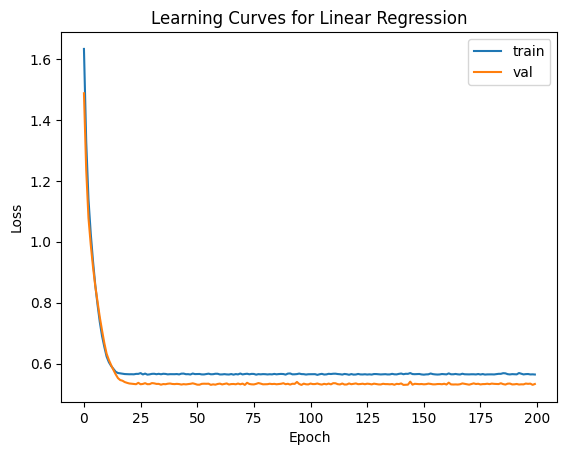

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, linear_model):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title(f'Learning Curves for {linear_model}')  # Добавляем информацию о модели в заголовок
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Построение кривых обучения для линейной регрессии
plot_learning_curves(history, linear_model='Linear Regression')


**Задание 10**   
Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.

Определим медианы для каждого признака, кроме независимого и зависимого. Сортируем список зависимого признака и подставим его в dataframe. Заменим все значения остальных признаков на их медианы.

In [ ]:
median = x_train.drop(columns=['temp_lower']).median()

x = np.array(x_test['temp_lower'])
x.sort()

m = x_test.copy()
m['temp_lower'] = x

for indexes, value in zip(median.index, median.values):
  m[str(indexes)] = value
m.head()

plt.scatter(x, yy_test, color='b', label='Data')
plt.plot(x, linear_model.predict(m), c='purple', label="линейная")
plt.plot(x, l1_model.predict(m), c='pink', label="лассо")
plt.plot(x, l2_model.predict(m), c='r', label="гребневая")
plt.xlabel("temp_lower")
plt.ylabel("year")
plt.title("График плоскости для признаков")
plt.legend()
plt.show()